# Problem Statement

* __Design and develop Machine Learning model to predict the calories burned during physical activities, with the aim of creating an efficient tool for accurate calorie estimation. The objective is to provide users with a reliable fitness management solution and to make data-driven decisions about their exercise routines using the no. of calories burned information. The model's optimization will contribute to an enhanced user experience by delivering accurate calorie estimates, fostering effective fitness planning, and ultimately facilitating the achievement of optimal health.__

# Calories Brunt Prediction

* __Importing Libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to display matplotlib plots directly in the notebook interface
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

### - Importing Dataset

In [2]:
calories = pd.read_csv(r"F:\ITV\ML\Project\calories.csv")
exercise = pd.read_csv(r"F:\ITV\ML\Project\exercise.csv")

### - Analyzing the Data

In [3]:
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [4]:
calories.tail()

User_ID  Calories
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

In [5]:
exercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [6]:
exercise.tail()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

In [7]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [8]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [9]:
calories.shape

(15000, 2)

In [10]:
exercise.shape

(15000, 8)

In [11]:
calories.describe()

User_ID      Calories
count  1.500000e+04  15000.000000
mean   1.497736e+07     89.539533
std    2.872851e+06     62.456978
min    1.000116e+07      1.000000
25%    1.247419e+07     35.000000
50%    1.499728e+07     79.000000
75%    1.744928e+07    138.000000
max    1.999965e+07    314.000000

In [12]:
exercise.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  
mean      95.518533     40.025453  
std        9.583328      0.779230  
min       67.000000     37.100000  
25%       88.000000     39.600000  
50%       96.000000     40.200000  
75%      103.000000     40.600000  
max      128.000000     41.500000

In [13]:
exercise.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

### - Merging both DataFrames on "User_ID" column

In [14]:
workout = pd.merge(exercise,calories, on = 'User_ID')
workout.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

## - Performing Exploratory Data Aanalysis

### - Checking the Null Values

In [15]:
workout.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### - Identifying the Outliers 

* __What are outliers?__

* __Outliers are data points that lie significantly outside the typical range of values in a dataset. They can distort statistical analyses and machine learning models, making it important to detect and address them to ensure accurate and reliable results.__
* __Common methods for identifying outliers:__
    * __Interquartile Range (IQR)__
    * __Visual tools such as box plots.__

<Axes: >

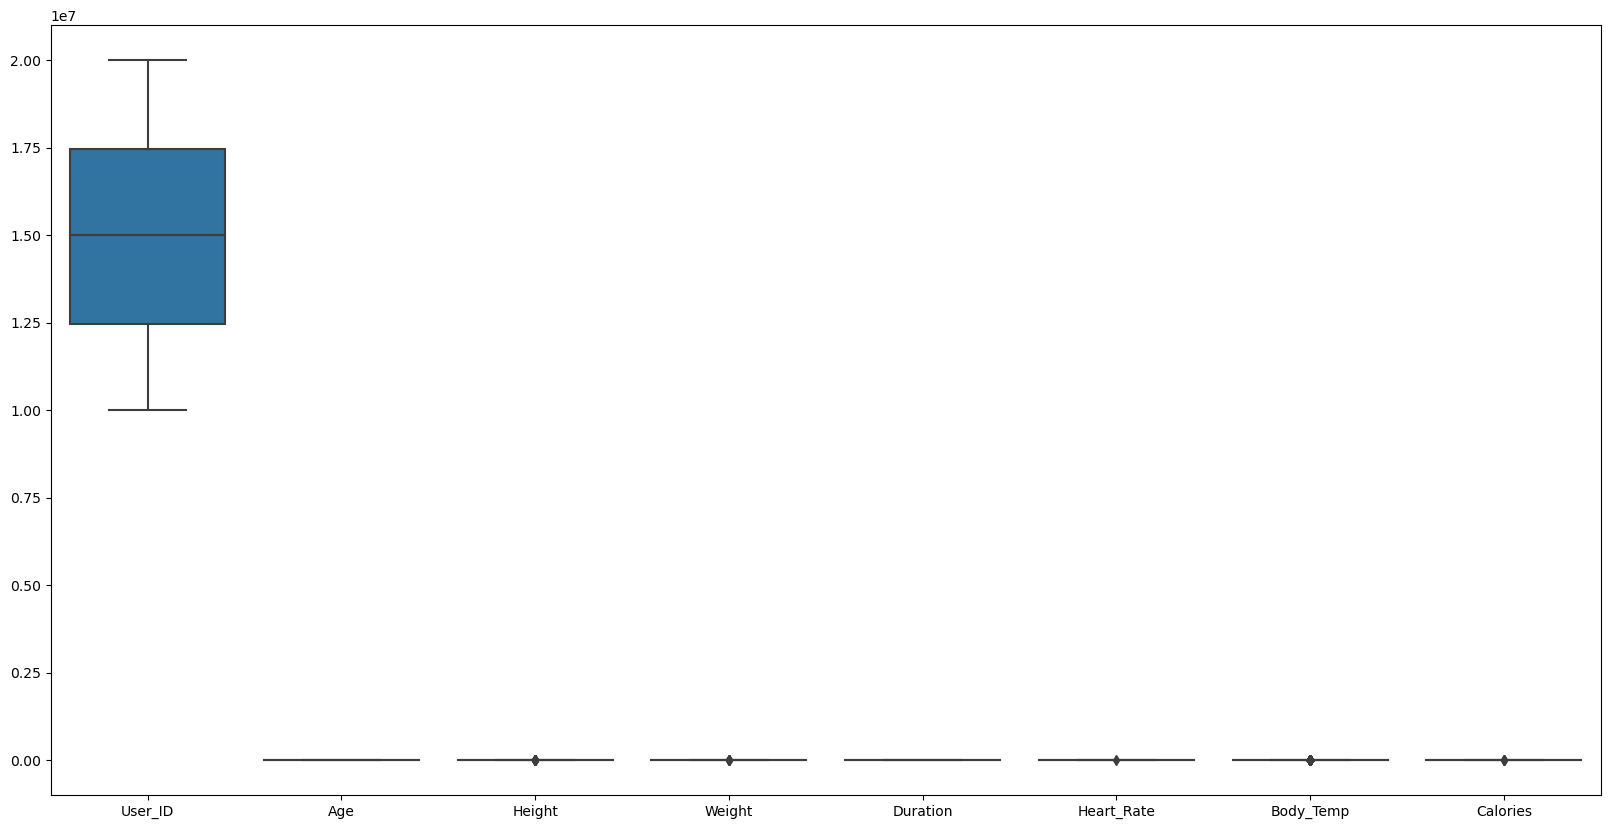

In [16]:
sns.boxplot(data = workout)

<Axes: ylabel='Height'>

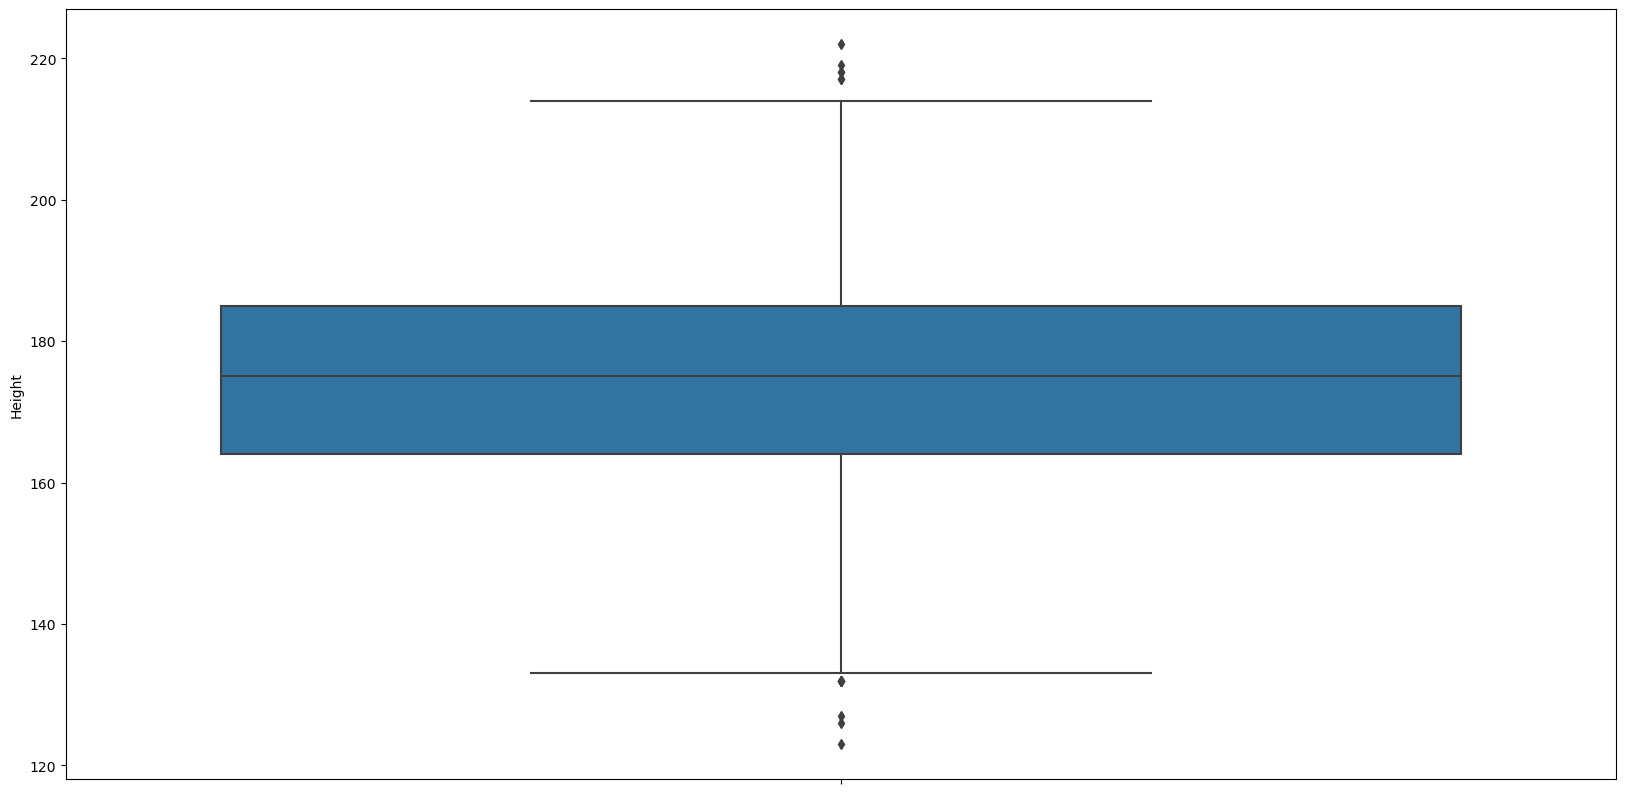

In [17]:
sns.boxplot(y='Height', data = workout)

<Axes: ylabel='Weight'>

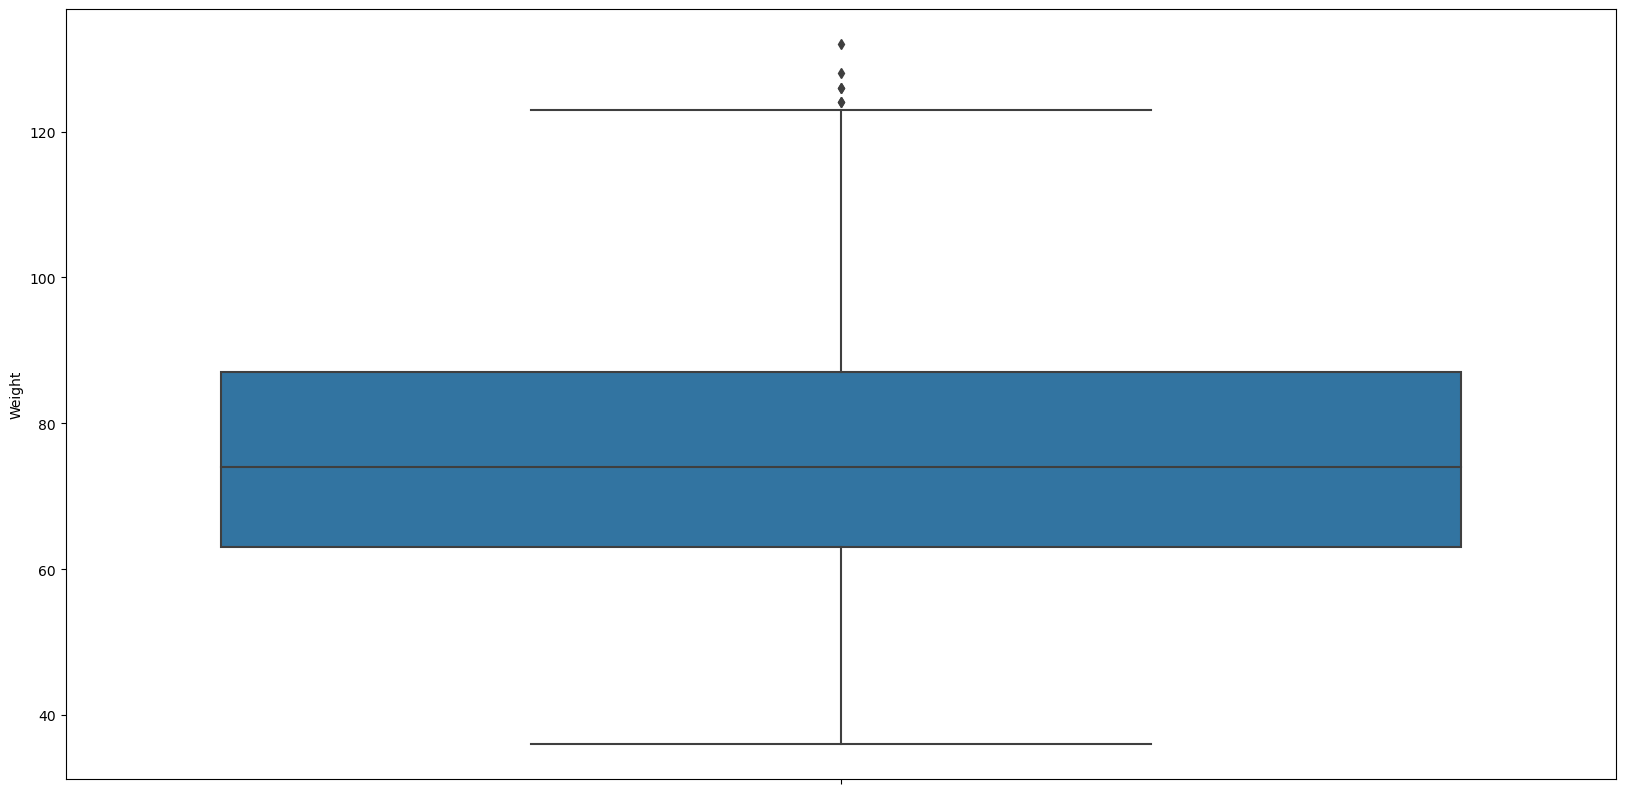

In [18]:
sns.boxplot(y='Weight', data = workout)

<Axes: ylabel='Heart_Rate'>

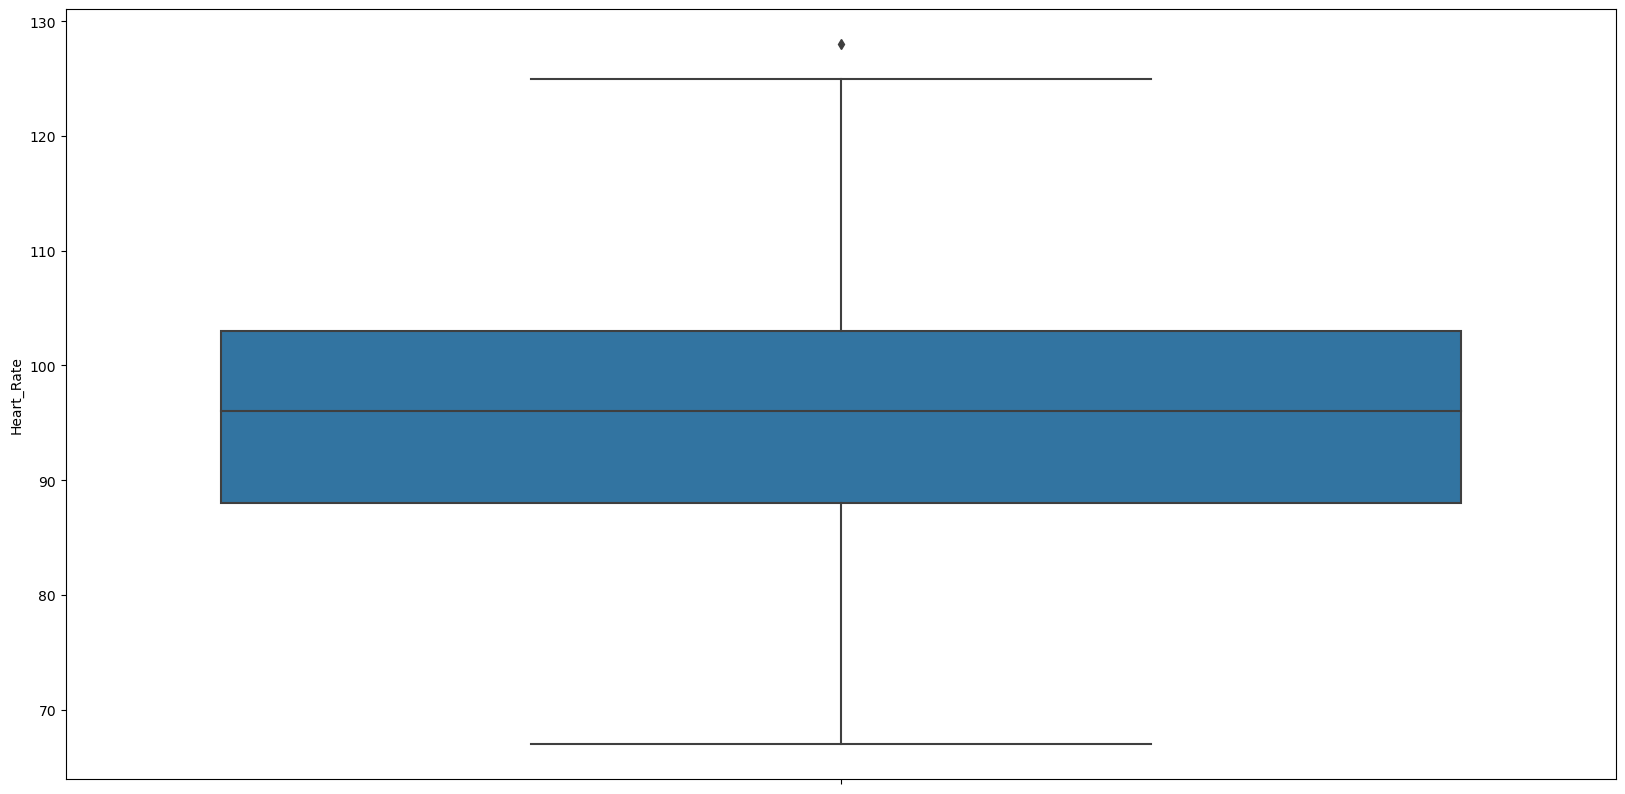

In [19]:
sns.boxplot(y='Heart_Rate', data = workout)

<Axes: ylabel='Body_Temp'>

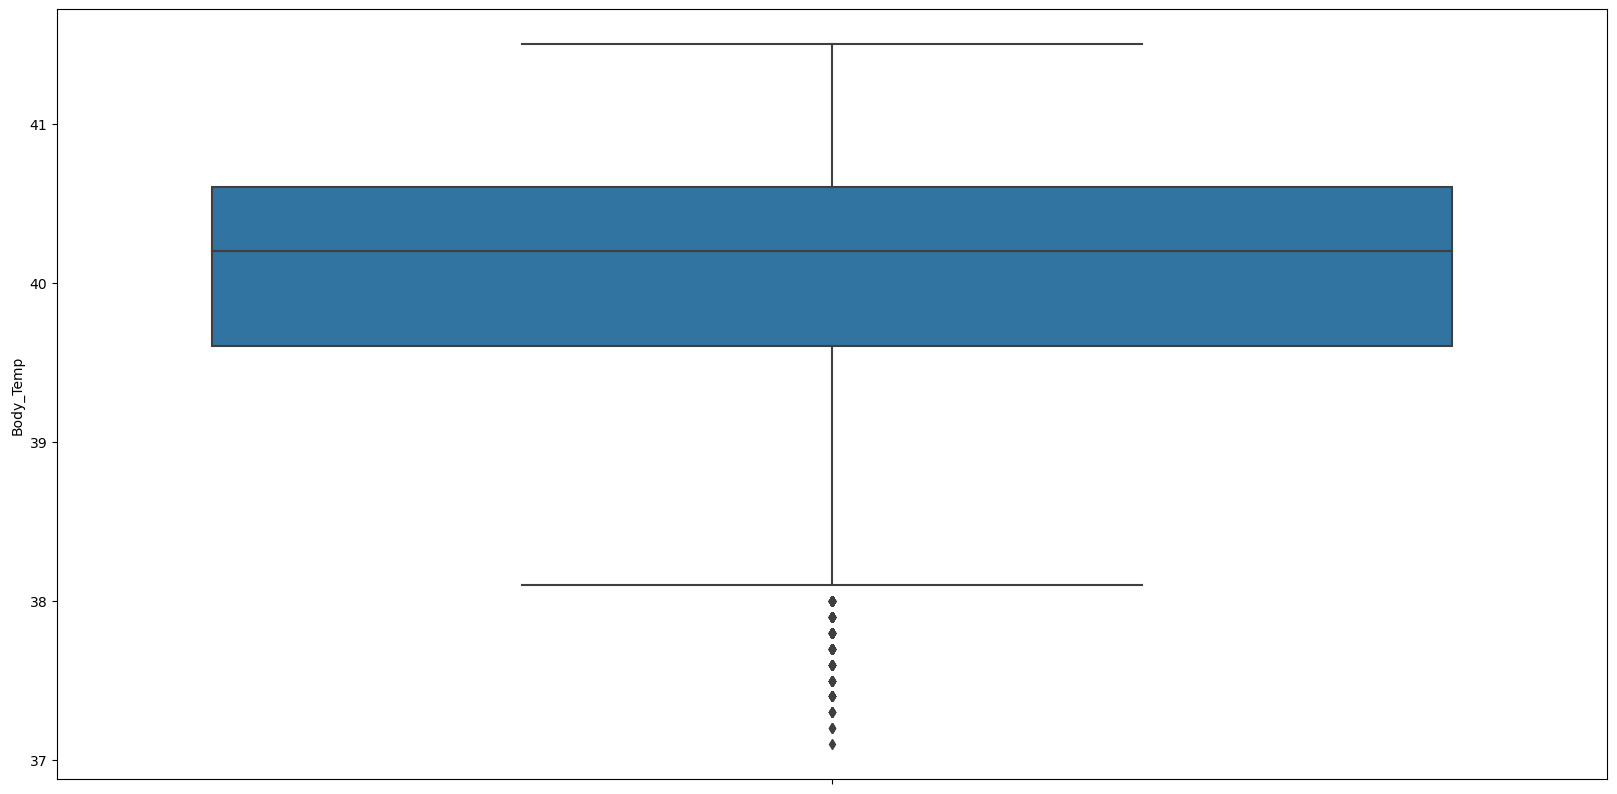

In [20]:
sns.boxplot(y='Body_Temp', data = workout)

### - Treating the Outliers 

* __Treating outliers is important because they can significantly impact the results of statistical analyses and machine learning models.__
* __Outliers can skew measures of central tendency, such as the mean, leading to inaccurate characterizations of the data distribution.__
* __In predictive modeling, outliers can disproportionately influence model training, resulting in less robust and less accurate models.__ 
* __Addressing outliers helps improve the reliability and accuracy of analysis and models by mitigating the undue influence of extreme values on the overall dataset.__

In [21]:
def get_whiskers(col_name):
        Q1 = workout[col_name].quantile(0.25)   # for 1 column compute Q1
        Q3 = workout[col_name].quantile(0.75)   # for 1 column compute Q3 
        IQR = Q3-Q1   # for 1 column compute IQR
        UB = Q3 + 1.5 * IQR       # for 1 column compute UPPER BOUND\LIMIT
        LB = Q1 - 1.5 * IQR       # for 1 column compute LOWER BOUND\LIMIT
        return UB, LB

In [22]:
for col_name in workout:    #col_name = column Name 
    if workout[col_name].dtype in ('int','float'):    #df[i] = every column will select int and float valules only
        LB, UB = get_whiskers(col_name)    # 
        workout[col_name].clip(upper = UB , lower = LB , inplace = True)# the clip method , limit the values in the current column to be within the specified upper (UB) and lower (LB) bounds

<Axes: >

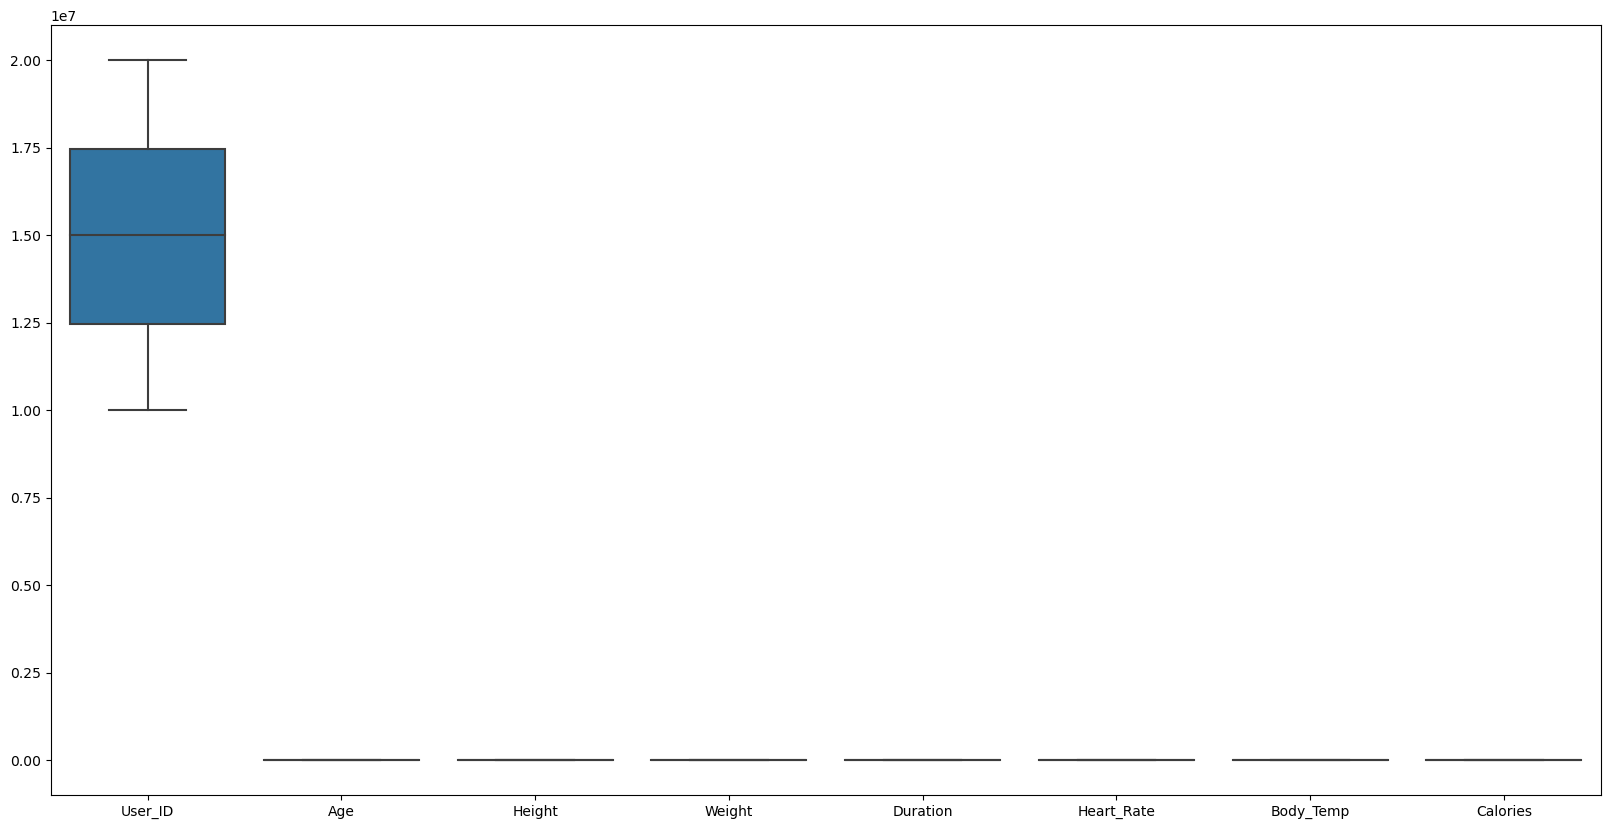

In [23]:
sns.boxplot(data = workout)

<Axes: ylabel='Weight'>

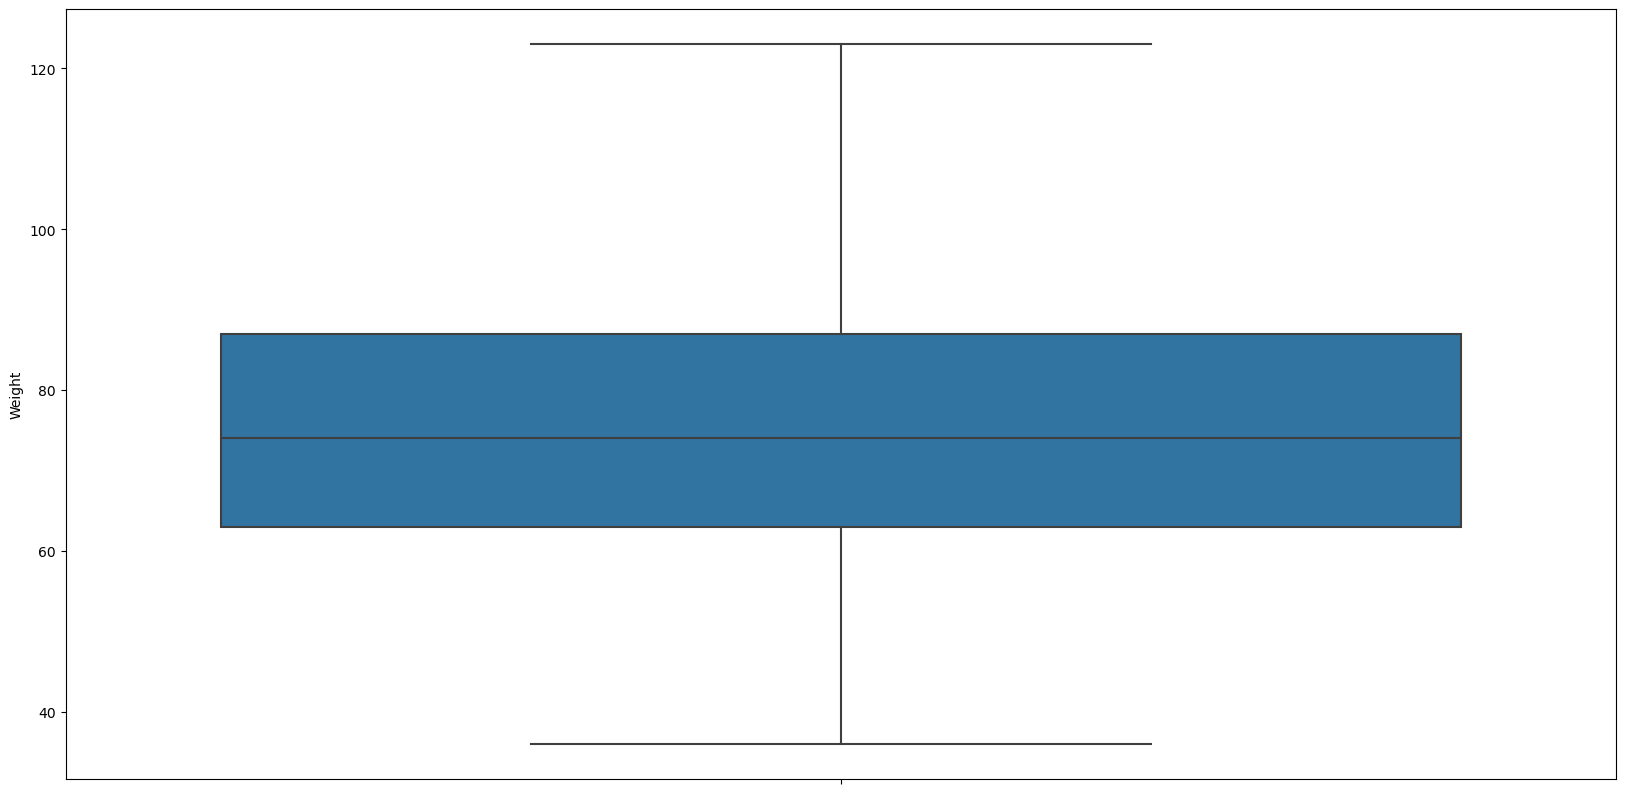

In [24]:
sns.boxplot(y='Weight',data = workout)

<Axes: ylabel='Height'>

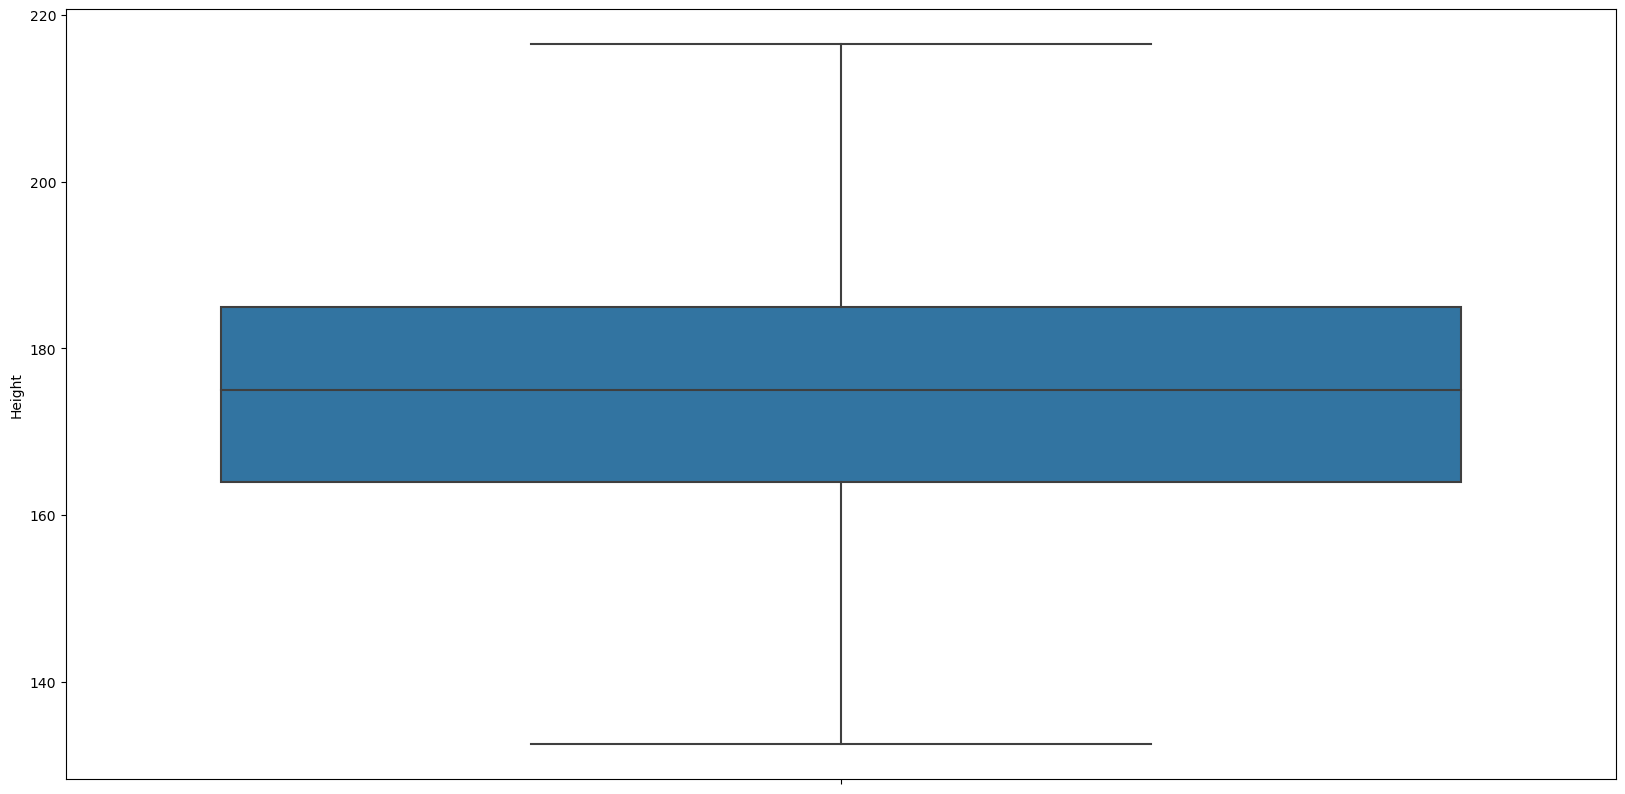

In [25]:
sns.boxplot(y='Height',data = workout)

<Axes: ylabel='Heart_Rate'>

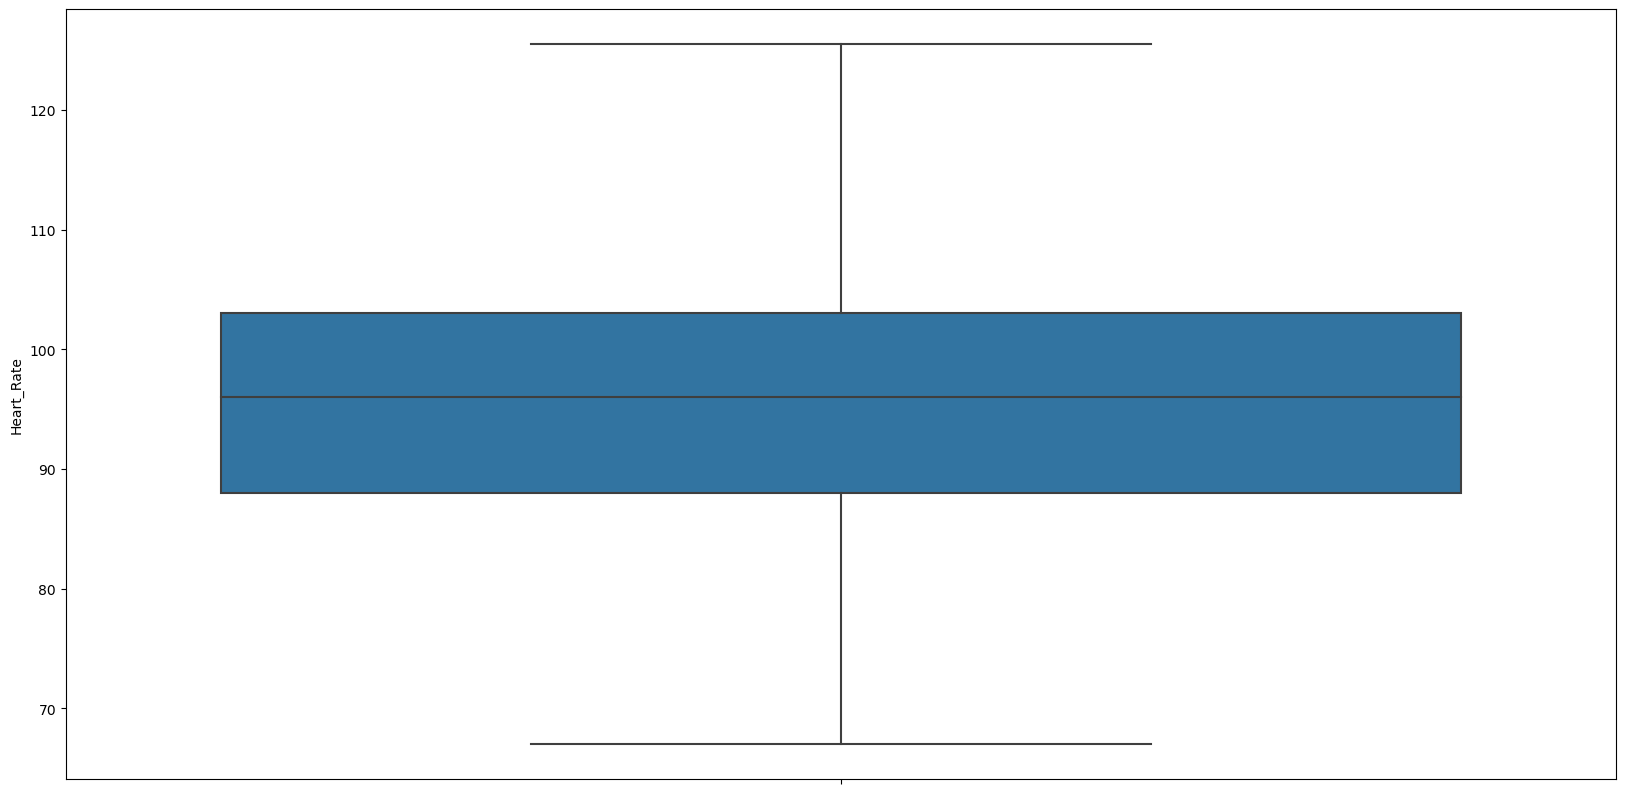

In [26]:
sns.boxplot(y='Heart_Rate',data = workout)

<Axes: ylabel='Body_Temp'>

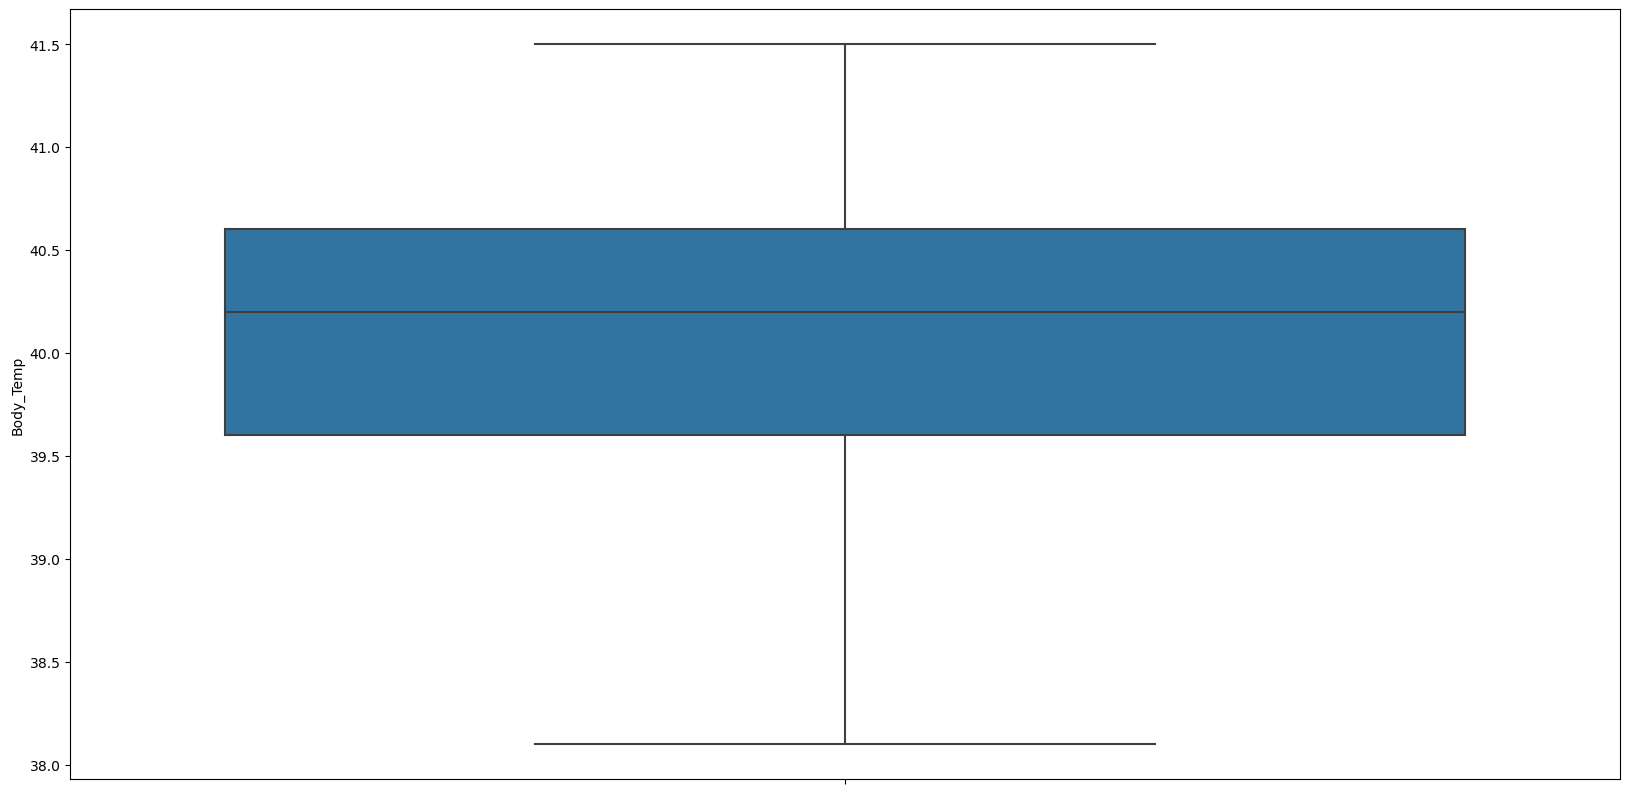

In [27]:
sns.boxplot(y='Body_Temp',data = workout)

### - Removing unwanted Columns 

In [28]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [29]:
workout.drop(['User_ID'],axis = 1 , inplace = True)

In [30]:
workout.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0

In [31]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


## Handling Categorical Data

* __Handling categorical data is crucial in machine learning to ensure compatibility with algorithms, prevent misinterpretation, and enhance model performance.__


In [32]:
workout['Gender'].head()

0      male
1    female
2      male
3    female
4    female
Name: Gender, dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder

for col in workout.columns:
    if workout[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(workout[col].values))
        workout[col] = lbl.transform(workout[col].values) # for male -> 1 and for female -> 0

In [34]:
workout.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       1   68   190.0    94.0      29.0       105.0       40.8     231.0
1       0   20   166.0    60.0      14.0        94.0       40.3      66.0
2       1   69   179.0    79.0       5.0        88.0       38.7      26.0
3       0   34   179.0    71.0      13.0       100.0       40.5      71.0
4       0   27   154.0    58.0      10.0        81.0       39.8      35.0

In [35]:
workout.Gender.value_counts() 

Gender
0    7553
1    7447
Name: count, dtype: int64

In [36]:
workout.describe()

Gender           Age        Height        Weight      Duration  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.496467     42.789800    174.465933     74.965400     15.530600   
std        0.500004     16.980264     14.250563     15.030691      8.319203   
min        0.000000     20.000000    132.500000     36.000000      1.000000   
25%        0.000000     28.000000    164.000000     63.000000      8.000000   
50%        0.000000     39.000000    175.000000     74.000000     16.000000   
75%        1.000000     56.000000    185.000000     87.000000     23.000000   
max        1.000000     79.000000    216.500000    123.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518367     40.033207     89.537267  
std        9.582785      0.757570     62.449328  
min       67.000000     38.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      125.500000     41.500000    292.500000

## Data Visualization

#### - Gender Distrubution

In [37]:
import plotly.express as px

figure = px.pie(workout , names = 'Gender')
figure.show()

#### - Age Distribution

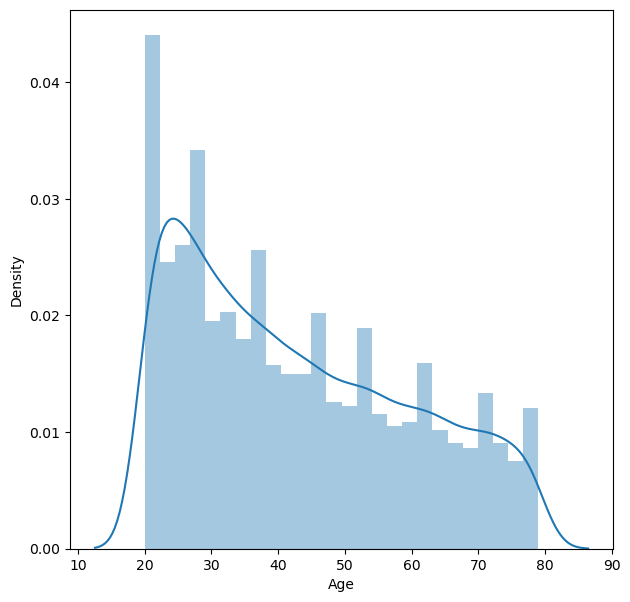

In [38]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Age'])
plt.show()

#### - Height Distribution

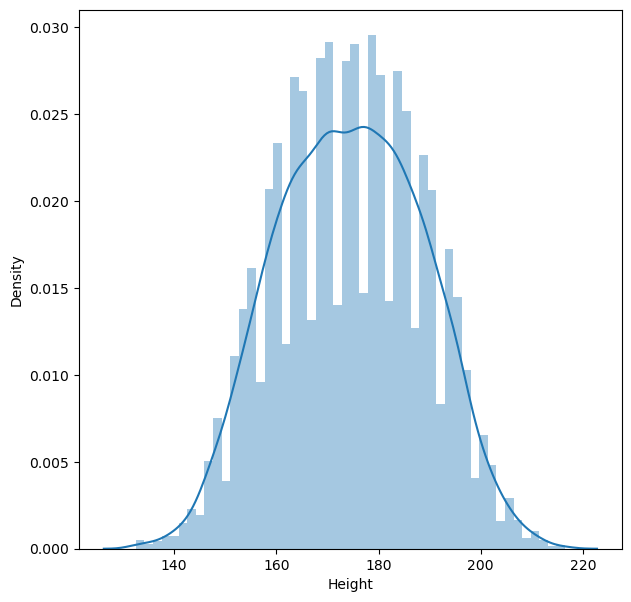

In [39]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Height'])
plt.show()

#### - Weight Distribution

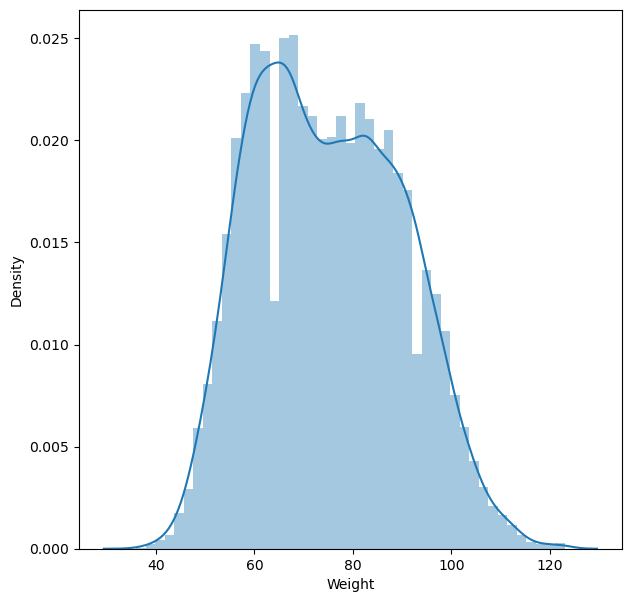

In [40]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Weight'])
plt.show()

#### - Duration Distribution

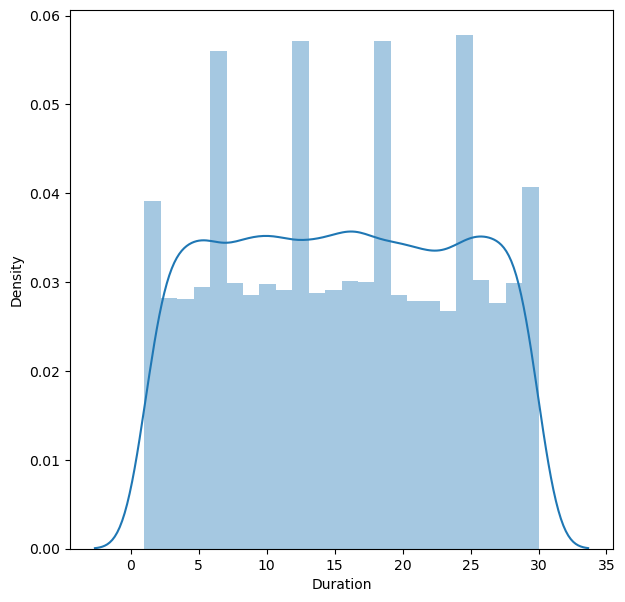

In [41]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Duration'])
plt.show()

#### - Heart Rate Distribution

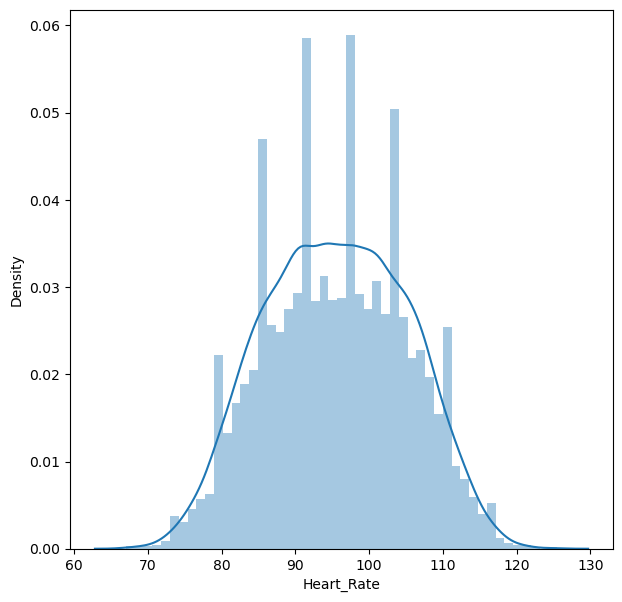

In [42]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Heart_Rate'])
plt.show()

#### - Body Temperature Distribution 

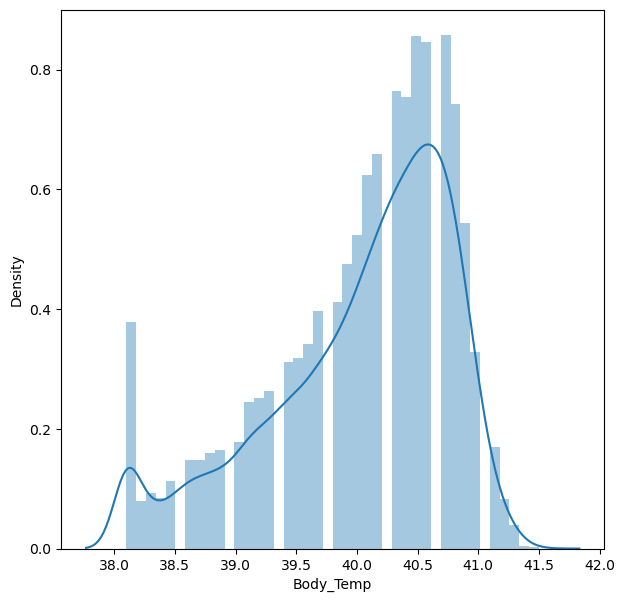

In [43]:
plt.figure(figsize=(7,7))
sns.distplot(workout['Body_Temp'])
plt.show()

## - Visualization all Numeric Values

<Figure size 700x1400 with 0 Axes>

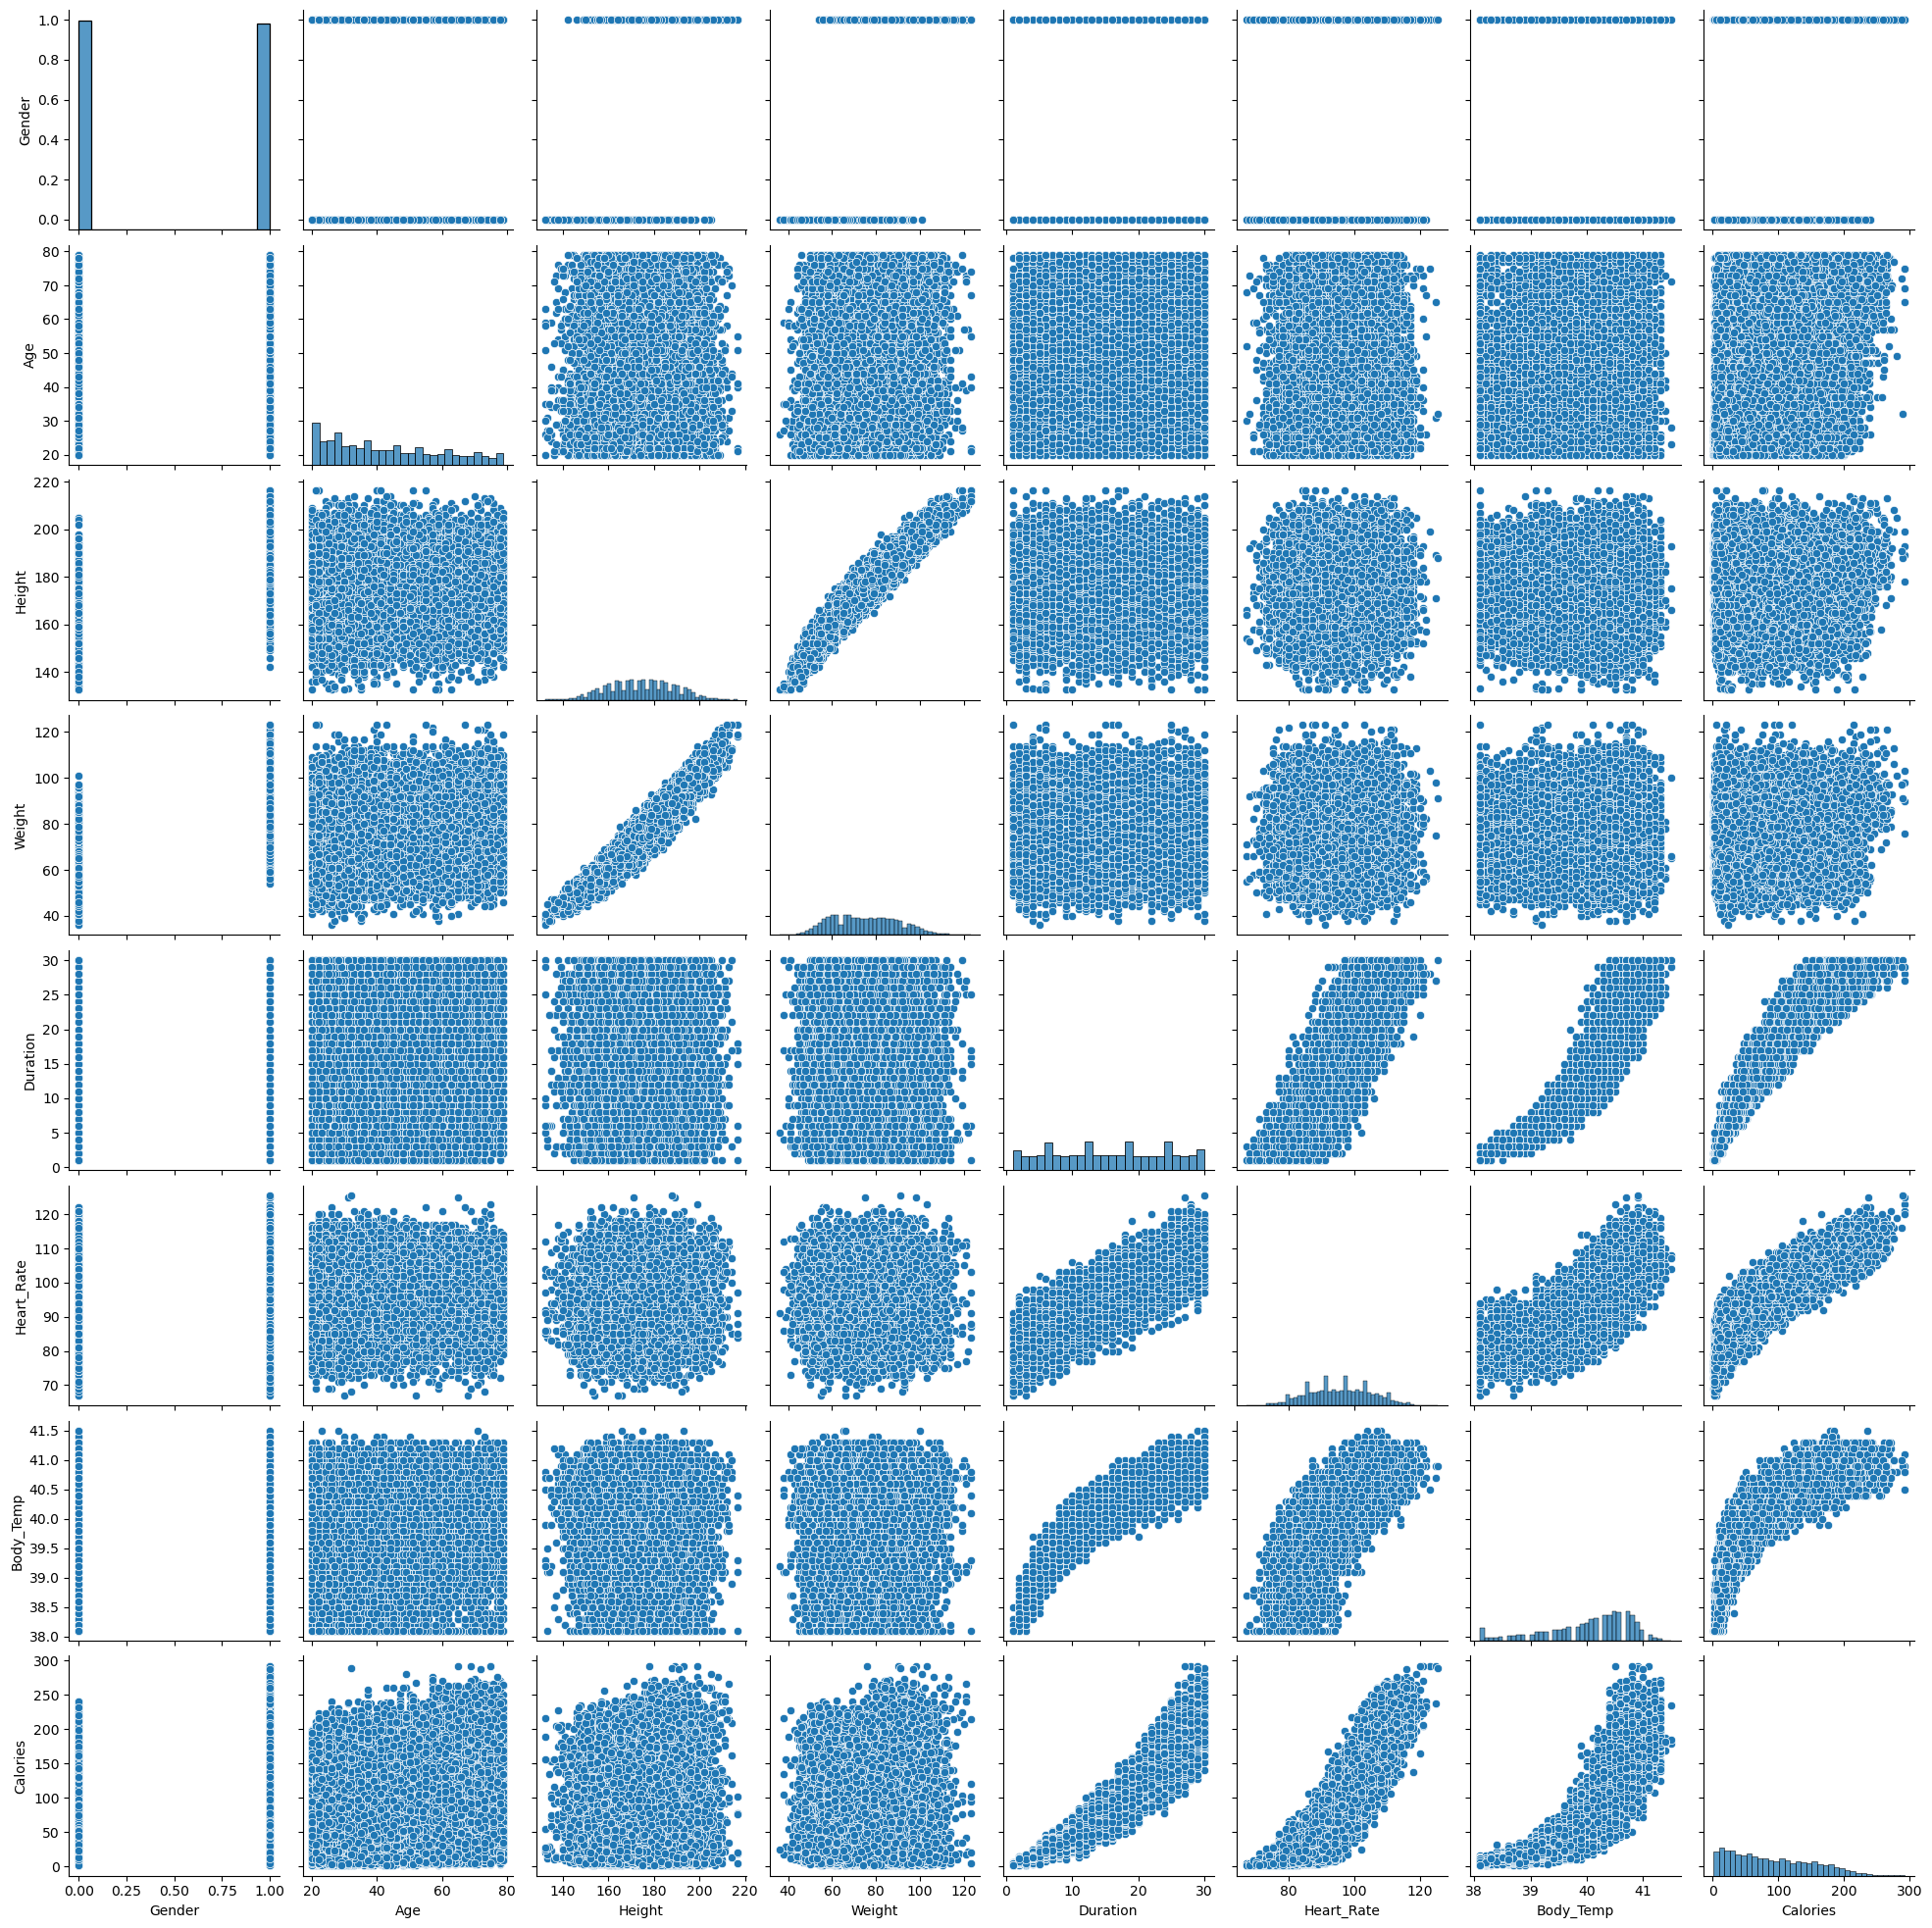

In [44]:
plt.figure(figsize=(7,14))
sns.pairplot(workout)
plt.show()

## - Correlation 

* __Correlation is a statistical measure that "measures the strength of the relationship between two variables.__ 


In [45]:
correlation = workout.corr()
correlation.style.applymap(lambda x : 'background-color : yellow' if x > 0.7 else '')

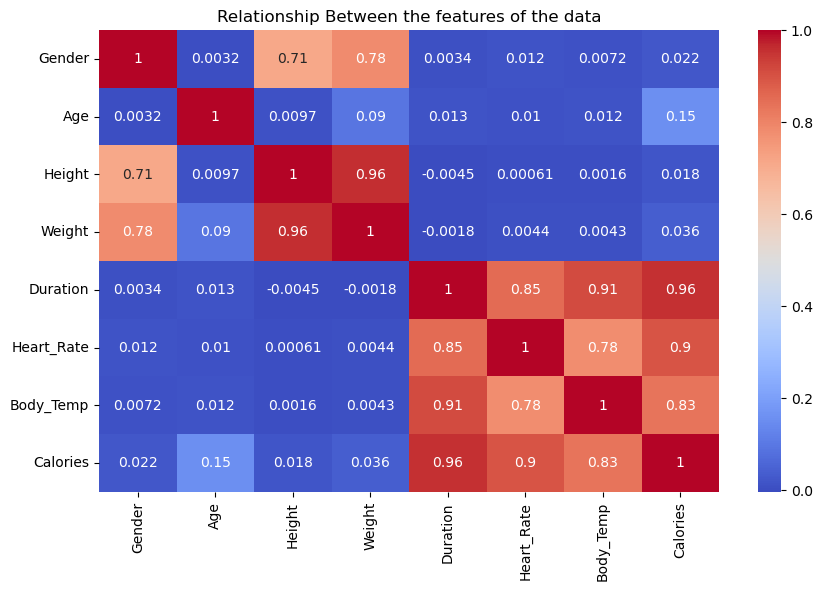

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(workout.corr() , cmap=plt.cm.coolwarm, annot = True)
plt.title("Relationship Between the features of the data")
plt.show()

### *** Train Test Split ***

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = workout.drop('Calories', axis = 1)
Y = workout['Calories']

In [49]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state=2023)

In [50]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

### Scaling the Data

* __Scaling is vital in machine learning to avoid bias toward variables with larger scales and enhance the performance of the algorithm.__

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
SC  = StandardScaler() 
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

## *** MODEL Training and Testing ***

In [53]:
from  sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
# Creating Insatances of the Model
Lin_Reg = LinearRegression()

DT = DecisionTreeRegressor(max_depth = 3)

RF = RandomForestRegressor(max_depth = 3 , n_estimators =500)

ADA = AdaBoostRegressor(n_estimators = 50 , learning_rate= 0.01)

GBR = GradientBoostingRegressor(max_depth = 2 , n_estimators = 100 , learning_rate = 0.2)

XGBR = XGBRegressor(max_depth = 2 , n_estimator = 100 , learning_rate  = 0.2)

* __The `my_model` function trains a given machine learning model, makes predictions on test data, and evaluates its performance .__
* __Using key metrics such as R2 score, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE).__
* __The function returns the predictions and these evaluation metrics.__

In [55]:
def my_model(model):
    
    # Training the  model
    model.fit(X_train,Y_train)
    
    # Prediction on Test Data
    ypred = model.predict(X_test)
    
    # Training Score
    Training_Score = model.score(X_train , Y_train )   
        
    #Testing Score 
    Testing_Score = model.score(X_test , Y_test)  
    
    # Evaluation Metrics
    R2 = r2_score(Y_test ,ypred)
    MAE = mean_absolute_error(Y_test ,ypred)
    MSE = mean_squared_error(Y_test,ypred)
    RMSE = np.sqrt(MSE)
    
    return ypred, R2, MAE, MSE, RMSE


In [56]:
# List of models
models = [Lin_Reg, DT, RF, ADA, GBR, XGBR]

# Lists to store results
R2_Score_Result = []
MAE_Result = []
MSE_Result = []
RMSE_Result = []
ypred_Result = []


# List of Models names
Model_Names = ["Linear Regression" , "Decision Tree" , "Random Forest" , "ADA Boost" , "Gradient Boosting" , "XGBoost"]


* __The code iterates through a list of machine learning models, applying the `my_model` function to each model.__ 
* __It collects and stores the results for each model, facilitating a comparative assessment of their performance.__

In [57]:
# Loop through models and collect results
for model in models:
    ypred, R2 ,MAE , MSE , RMSE = my_model(model)
    R2_Score_Result.append(R2)
    MAE_Result.append(MAE)
    MSE_Result.append(MSE)
    RMSE_Result.append(RMSE)
    ypred_Result.append(ypred)

# Results

* __A DataFrame named `All_Results` is constructed, consolidating performance metrics for different machine learning models enabling a concise comparison of model effectiveness.__

In [58]:
len(R2_Score_Result)

6

In [59]:
All_Results = pd.DataFrame({"Model Names":Model_Names,
                            "R2_Score":R2_Score_Result,
                            "Mean Absolute Error":MAE_Result,
                            "Mean Squared Error":MSE_Result,
                            "Root Mean Squared Error":RMSE_Result})
All_Results

Model Names  R2_Score  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression  0.966057             8.397953          125.811540   
1      Decision Tree  0.920576            12.593570          294.389231   
2      Random Forest  0.933948            11.335501          244.826231   
3          ADA Boost  0.927774            12.019197          267.708951   
4  Gradient Boosting  0.993202             3.665973           25.197136   
5            XGBoost  0.993874             3.498504           22.706590   

   Root Mean Squared Error  
0                11.216574  
1                17.157775  
2                15.646924  
3                16.361814  
4                 5.019675  
5                 4.765143

### Ploting Results

* __The code creates a DataFrame named `Prediction` containing actual and predicted calories burnt values.__
* __It then utilizes Seaborn to generate a relational plot, visualizing the relationship between actual and predicted calories burnt.__

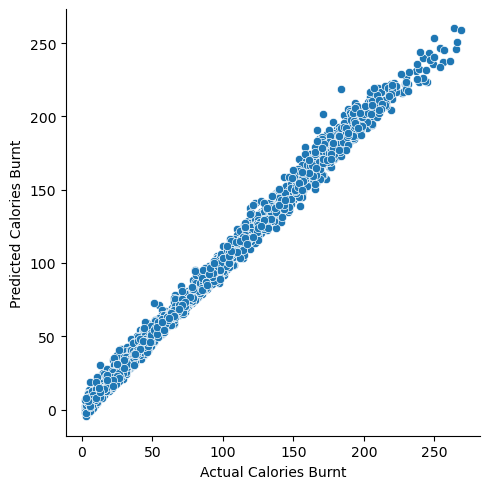

In [60]:
Prediction = pd.DataFrame({'Actual Calories Burnt':Y_test,'Predicted Calories Burnt': ypred})
sns.relplot(data = Prediction, x = 'Actual Calories Burnt',y = 'Predicted Calories Burnt')

* __The code creates a 2x2 subplot grid, visually comparing the performance of different machine learning models using key metrics.__
* __Each subplot displays a horizontal bar chart representing evaluation metrics for each model.__
* __The layout provides a comprehensive assessment of model effectiveness, aiding in the selection of the most suitable algorithm.__

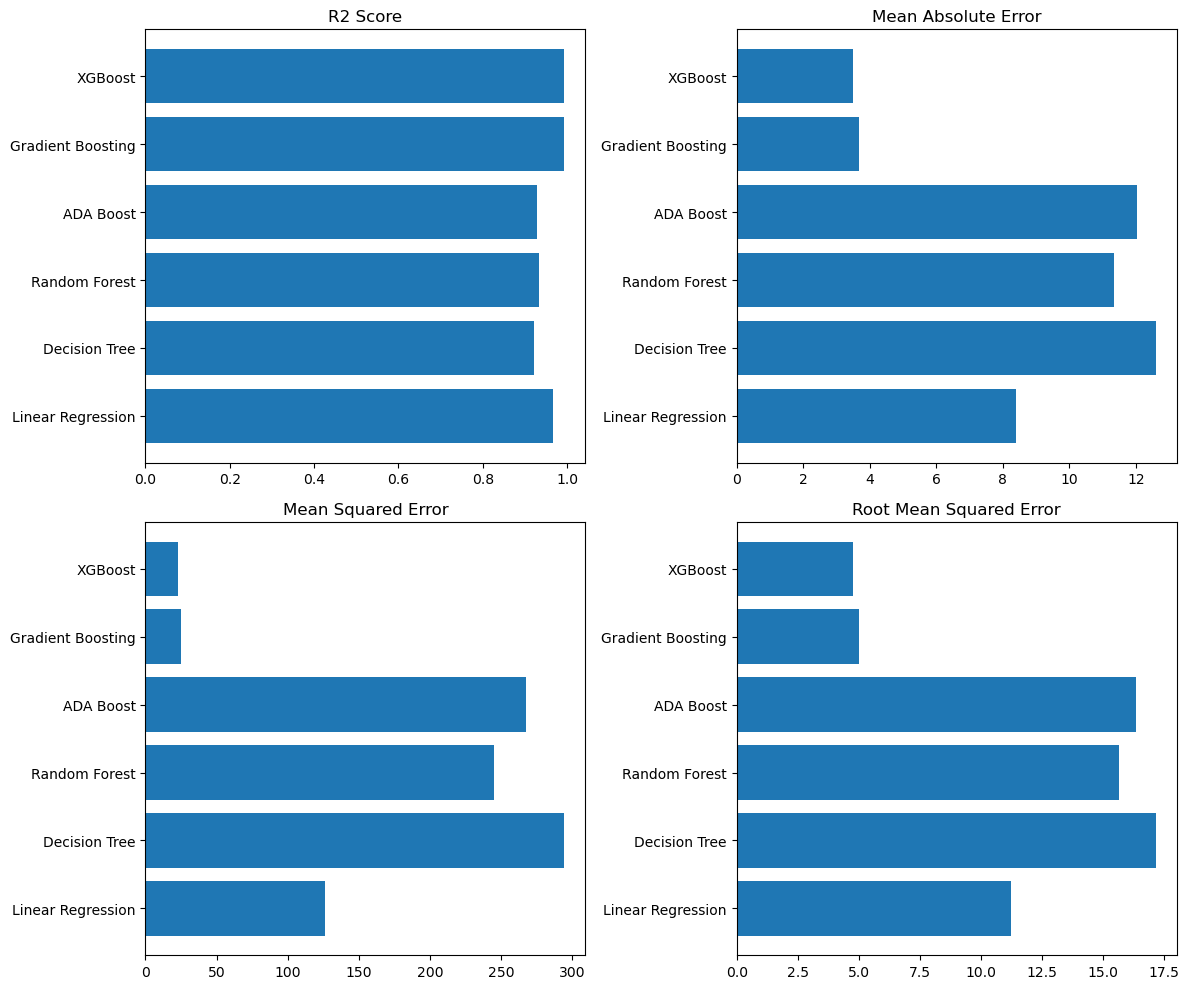

In [61]:
# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# R2 Score
axes[0, 0].barh(All_Results["Model Names"], All_Results["R2_Score"])
axes[0, 0].set_title("R2 Score")

# Mean Absolute Error
axes[0, 1].barh(All_Results["Model Names"], All_Results["Mean Absolute Error"])
axes[0, 1].set_title("Mean Absolute Error")

# Mean Squared Error
axes[1, 0].barh(All_Results["Model Names"], All_Results["Mean Squared Error"])
axes[1, 0].set_title("Mean Squared Error")

# Root Mean Squared Error
axes[1, 1].barh(All_Results["Model Names"], All_Results["Root Mean Squared Error"])
axes[1, 1].set_title("Root Mean Squared Error")

plt.tight_layout() # Adjusts the layout to prevent subplot labels from overlapping.
plt.show()